In [340]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.optimizers import Adam



warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/road-accidents-dataset/Road Accident Data.csv


In [341]:
df = pd.read_csv('/kaggle/input/road-accidents-dataset/Road Accident Data.csv')
df.head()

Accident_Index Accident Date Day_of_Week          Junction_Control  \
0      BS0000001    01-01-2021    Thursday  Give way or uncontrolled   
1      BS0000002    05-01-2021      Monday  Give way or uncontrolled   
2      BS0000003    04-01-2021      Sunday  Give way or uncontrolled   
3      BS0000004    05-01-2021      Monday       Auto traffic signal   
4      BS0000005    06-01-2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea                 NaN  ...   
2               Daylight     Kensington and Chelsea                 NaN  ...   
3               Daylight     Kensington and Chelsea                 NaN  ...   
4  Darkness - lights lit     Kensington and Chelsea                 NaN  ...   

   Number_of_Casualties  Number_of_Vehicles         Police_Force  \
0                     1                   2  Metropolitan Police   
1                    11                   2  Metropolitan Police   
2                     1                   2  Metropolitan Police   
3                     1                   2  Metropolitan Police   
4                     1                   2  Metropolitan Police   

  Road_Surface_Conditions           Road_Type Speed_limit   Time  \
0                     Dry      One way street          30  15:11   
1             Wet or damp  Single carriageway          30  10:59   
2                     Dry  Single carriageway          30  14:19   
3            Frost or ice  Single carriageway          30  08:10   
4                     Dry  Single carriageway          30  17:25   

  Urban_or_Rural_Area  Weather_Conditions           Vehicle_Type  
0               Urban  Fine no high winds                    Car  
1               Urban  Fine no high winds  Taxi/Private hire car  
2               Urban  Fine no high winds  Taxi/Private hire car  
3               Urban               Other  Motorcycle over 500cc  
4               Urban  Fine no high winds                    Car  

[5 rows x 21 columns]

In [342]:
print(df)

       Accident_Index Accident Date Day_of_Week              Junction_Control  \
0           BS0000001    01-01-2021    Thursday      Give way or uncontrolled   
1           BS0000002    05-01-2021      Monday      Give way or uncontrolled   
2           BS0000003    04-01-2021      Sunday      Give way or uncontrolled   
3           BS0000004    05-01-2021      Monday           Auto traffic signal   
4           BS0000005    06-01-2021     Tuesday           Auto traffic signal   
...               ...           ...         ...                           ...   
307968      BS0307969    18-02-2022    Thursday  Data missing or out of range   
307969      BS0307970    21-02-2022      Sunday  Data missing or out of range   
307970      BS0307971    23-02-2022     Tuesday      Give way or uncontrolled   
307971      BS0307972    23-02-2022     Tuesday      Give way or uncontrolled   
307972      BS0307973    28-02-2022      Sunday      Give way or uncontrolled   

                           

In [343]:
for col in df.columns:
    if col != 'Accident_Index':
        print(f"\n--- Unique values in '{col}' ---")
        print(df[col].unique())

print('\n')
print(df['Carriageway_Hazards'].unique())
print(df['Carriageway_Hazards'].head(10))


--- Unique values in 'Accident Date' ---
['01-01-2021' '05-01-2021' '04-01-2021' '06-01-2021' '08-01-2021'
 '02-01-2021' '07-01-2021' '10-01-2021' '16-01-2021' '12-01-2021'
 '09-01-2021' '17-01-2021' '25-01-2021' '26-01-2021' '19-01-2021'
 '27-01-2021' '21-01-2021' '22-01-2021' '31-01-2021' '03-02-2021'
 '29-01-2021' '28-01-2021' '20-01-2021' '15-01-2021' '09-02-2021'
 '23-01-2021' '10-02-2021' '30-01-2021' '12-02-2021' '16-02-2021'
 '14-02-2021' '18-02-2021' '21-02-2021' '15-02-2021' '20-02-2021'
 '27-02-2021' '18-01-2021' '07-02-2021' '23-02-2021' '22-02-2021'
 '26-02-2021' '04-03-2021' '03-03-2021' '06-03-2021' '17-02-2021'
 '09-03-2021' '10-03-2021' '02-03-2021' '25-02-2021' '14-03-2021'
 '28-02-2021' '11-02-2021' '01-03-2021' '13-03-2021' '17-03-2021'
 '24-02-2021' '20-03-2021' '05-02-2021' '21-03-2021' '24-03-2021'
 '23-03-2021' '25-03-2021' '27-03-2021' '28-03-2021' '18-03-2021'
 '30-03-2021' '01-04-2021' '31-03-2021' '03-04-2021' '06-04-2021'
 '26-03-2021' '22-03-2021' '29-03-

In [344]:
#Encoding dates into numbers [0::6]
print(df['Day_of_Week'].dtype)
days_map = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}


df['Day_of_Week'] = df['Day_of_Week'].map(days_map)


print(df.head())


object
  Accident_Index Accident Date  Day_of_Week          Junction_Control  \
0      BS0000001    01-01-2021            4  Give way or uncontrolled   
1      BS0000002    05-01-2021            1  Give way or uncontrolled   
2      BS0000003    04-01-2021            0  Give way or uncontrolled   
3      BS0000004    05-01-2021            1       Auto traffic signal   
4      BS0000005    06-01-2021            2       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington

In [345]:
print(df['Junction_Control'].unique())


df['Junction_Control'] = df['Junction_Control'].str.strip().str.lower()


c = {
    'give way or uncontrolled': 0,
    'auto traffic signal': 1,
    'data missing or out of range': np.nan,
    'authorised person': 2,
    'stop sign': 3,
    'not at junction or within 20 metres': 4,
    'auto traffic sigl': 5  
}


df['Junction_Control'] = df['Junction_Control'].map(c)


print(df['Junction_Control'].head())

['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres' 'Auto traffic sigl']
0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Junction_Control, dtype: float64


In [346]:
df = df.apply(lambda col: col.str.lower().str.strip() if col.dtype == 'object' else col)

In [347]:
#Junction_Detail
df['Junction_Detail'] = df['Junction_Detail'].map({
    't or staggered junction': 0,
    'crossroads': 1,
    'not at junction or within 20 metres': 2,
    'roundabout': 3,
    'mini-roundabout': 4,
    'more than 4 arms (not roundabout)': 5,
    'private drive or entrance': 6,
    'slip road': 7,
    'other junction': 8
})

# Accident_Severity
df['Accident_Severity'] = df['Accident_Severity'].map({
    'slight': 0,
    'serious': 1,
    'fatal': 2,
    'fetal': 2   # handling typo
})

# Light_Conditions
df['Light_Conditions'] = df['Light_Conditions'].map({
    'daylight': 0,
    'darkness - lights lit': 1,
    'darkness - lighting unknown': 2,
    'darkness - lights unlit': 3,
    'darkness - no lighting': 4
})

# Carriageway_Hazards
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].map({
    'pedestrian in carriageway - not injured': 0,
    'other object on road': 1,
    'any animal in carriageway (except ridden horse)': 2,
    'previous accident': 3,
    'vehicle load on road': 4
})

# Road_Surface_Conditions
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].map({
    'dry': 0,
    'wet or damp': 1,
    'frost or ice': 2,
    'snow': 3,
    'flood over 3cm. deep': 4
})

# Road_Type
df['Road_Type'] = df['Road_Type'].map({
    'one way street': 0,
    'single carriageway': 1,
    'dual carriageway': 2,
    'roundabout': 3,
    'slip road': 4
})

# Weather_Conditions
df['Weather_Conditions'] = df['Weather_Conditions'].map({
    'fine no high winds': 0,
    'fine + high winds': 1,
    'raining no high winds': 2,
    'raining + high winds': 3,
    'snowing no high winds': 4,
    'snowing + high winds': 5,
    'fog or mist': 6,
    'other': 7
})

# Vehicle_Type
df['Vehicle_Type'] = df['Vehicle_Type'].map({
    'car': 0,
    'taxi/private hire car': 1,
    'motorcycle over 500cc': 2,
    'van / goods 3.5 tonnes mgw or under': 3,
    'goods over 3.5t. and under 7.5t': 4,
    'goods 7.5 tonnes mgw and over': 5,
    'motorcycle 125cc and under': 6,
    'motorcycle 50cc and under': 7,
    'motorcycle over 125cc and up to 500cc': 8,
    'pedal cycle': 9,
    'bus or coach (17 or more pass seats)': 10,
    'minibus (8 - 16 passenger seats)': 11,
    'agricultural vehicle': 12,
    'ridden horse': 13,
    'other vehicle': 14
})

# Police_Force and Local_Authority_(District) as categorical codes
df['Police_Force'] = df['Police_Force'].astype('category').cat.codes
df['Local_Authority_(District)'] = df['Local_Authority_(District)'].astype('category').cat.codes

#urban and rural
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].map({
    'urban':1,
    'rural':0
})

In [348]:
print(df.dtypes)
print(df.head())

Accident_Index                 object
Accident Date                  object
Day_of_Week                     int64
Junction_Control              float64
Junction_Detail                 int64
Accident_Severity               int64
Latitude                      float64
Light_Conditions                int64
Local_Authority_(District)      int16
Carriageway_Hazards           float64
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                     int8
Road_Surface_Conditions         int64
Road_Type                       int64
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area             int64
Weather_Conditions              int64
Vehicle_Type                    int64
dtype: object
  Accident_Index Accident Date  Day_of_Week  Junction_Control  \
0      bs0000001    01-01-2021            4               0.0   
1      bs0000002    05-01-2021            1               

In [349]:
print(df['Carriageway_Hazards'].unique)

<bound method Series.unique of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
307968    NaN
307969    NaN
307970    NaN
307971    NaN
307972    1.0
Name: Carriageway_Hazards, Length: 307973, dtype: float64>


In [350]:
for col in df.columns:
    if col != 'Accident_Index':
        print(f"\n--- Unique values in '{col}' ---")
        print(df[col].unique())


--- Unique values in 'Accident Date' ---
['01-01-2021' '05-01-2021' '04-01-2021' '06-01-2021' '08-01-2021'
 '02-01-2021' '07-01-2021' '10-01-2021' '16-01-2021' '12-01-2021'
 '09-01-2021' '17-01-2021' '25-01-2021' '26-01-2021' '19-01-2021'
 '27-01-2021' '21-01-2021' '22-01-2021' '31-01-2021' '03-02-2021'
 '29-01-2021' '28-01-2021' '20-01-2021' '15-01-2021' '09-02-2021'
 '23-01-2021' '10-02-2021' '30-01-2021' '12-02-2021' '16-02-2021'
 '14-02-2021' '18-02-2021' '21-02-2021' '15-02-2021' '20-02-2021'
 '27-02-2021' '18-01-2021' '07-02-2021' '23-02-2021' '22-02-2021'
 '26-02-2021' '04-03-2021' '03-03-2021' '06-03-2021' '17-02-2021'
 '09-03-2021' '10-03-2021' '02-03-2021' '25-02-2021' '14-03-2021'
 '28-02-2021' '11-02-2021' '01-03-2021' '13-03-2021' '17-03-2021'
 '24-02-2021' '20-03-2021' '05-02-2021' '21-03-2021' '24-03-2021'
 '23-03-2021' '25-03-2021' '27-03-2021' '28-03-2021' '18-03-2021'
 '30-03-2021' '01-04-2021' '31-03-2021' '03-04-2021' '06-04-2021'
 '26-03-2021' '22-03-2021' '29-03-

In [351]:

print(df.columns.tolist())
print(df.columns)

['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


Training LinearRegression...
Training Ridge...
Training Lasso...
Training DecisionTree...
Training RandomForest...
Training SVR...


15:38:28 - cmdstanpy - INFO - Chain [1] start processing
15:38:28 - cmdstanpy - INFO - Chain [1] done processing


Training Prophet...


15:38:28 - cmdstanpy - INFO - Chain [1] start processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] start processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] start processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:30 - cmdstanpy - INFO - Chain [1] start processing
15:38:30 - cmdstanpy - INFO - Chain [1] done processing


Model Comparison:
              Model                                        Best Params   RMSE  \
2             Lasso                                     {'alpha': 0.1}   8.29   
6           Prophet  {'changepoint_prior_scale': 0.01, 'seasonality...   8.41   
1             Ridge                                     {'alpha': 0.1}   8.44   
0  LinearRegression                                                 {}   8.47   
5               SVR    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}   8.50   
4      RandomForest             {'max_depth': 10, 'n_estimators': 100}  12.03   
3      DecisionTree                                  {'max_depth': 20}  14.55   

   Accuracy (%)  R2_Score  
2         98.27    0.9920  
6         98.25    0.9917  
1         98.22    0.9917  
0         98.20    0.9916  
5         98.23    0.9915  
4         97.29    0.9831  
3         96.71    0.9752  


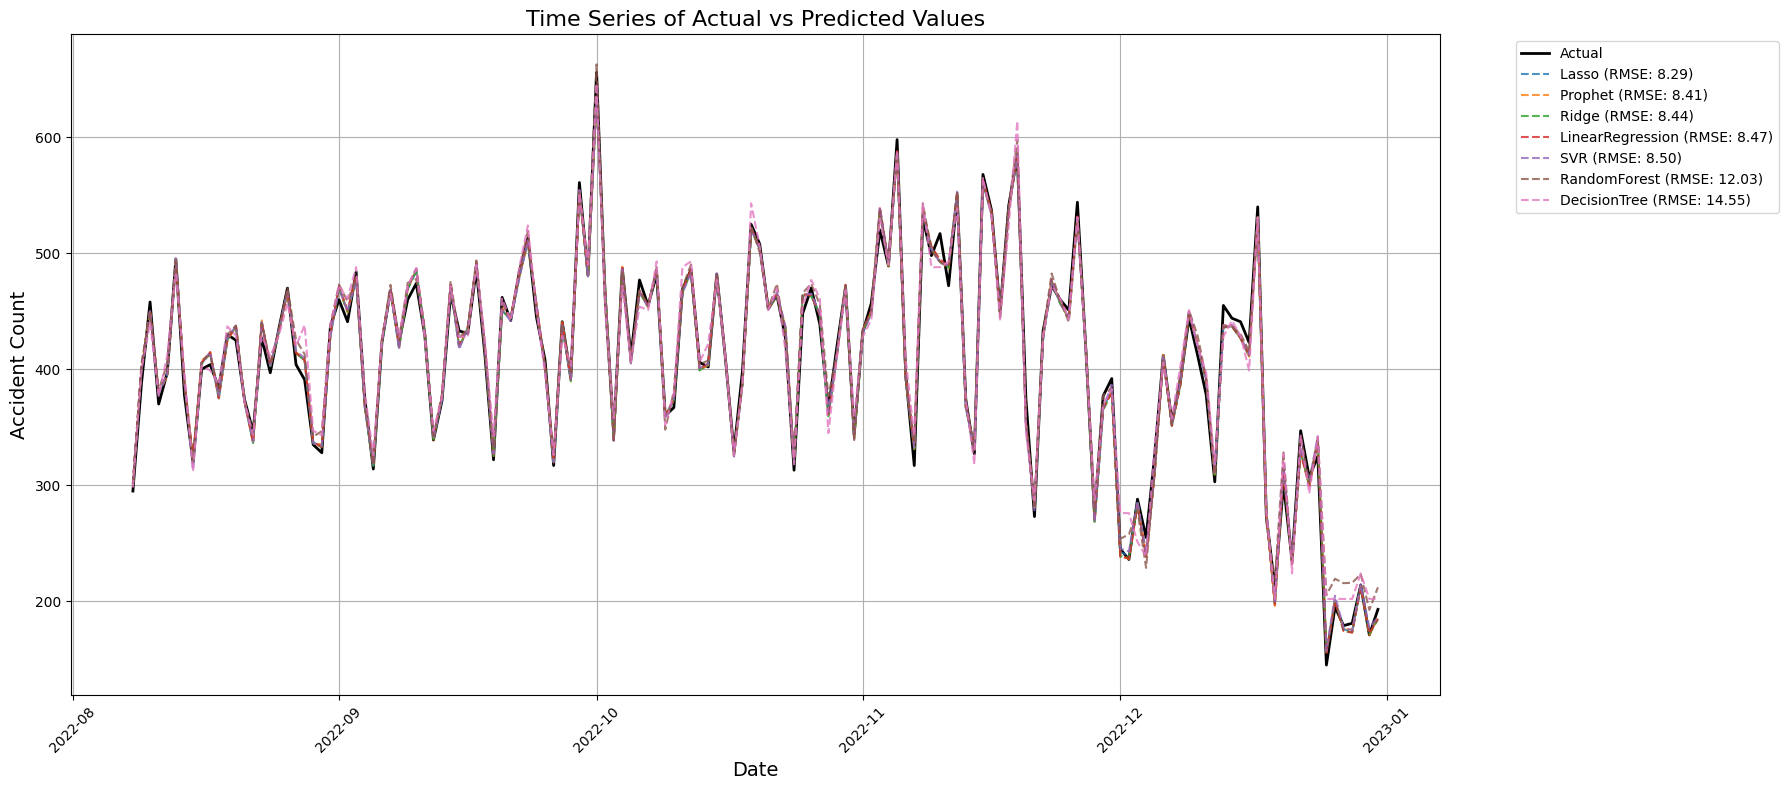

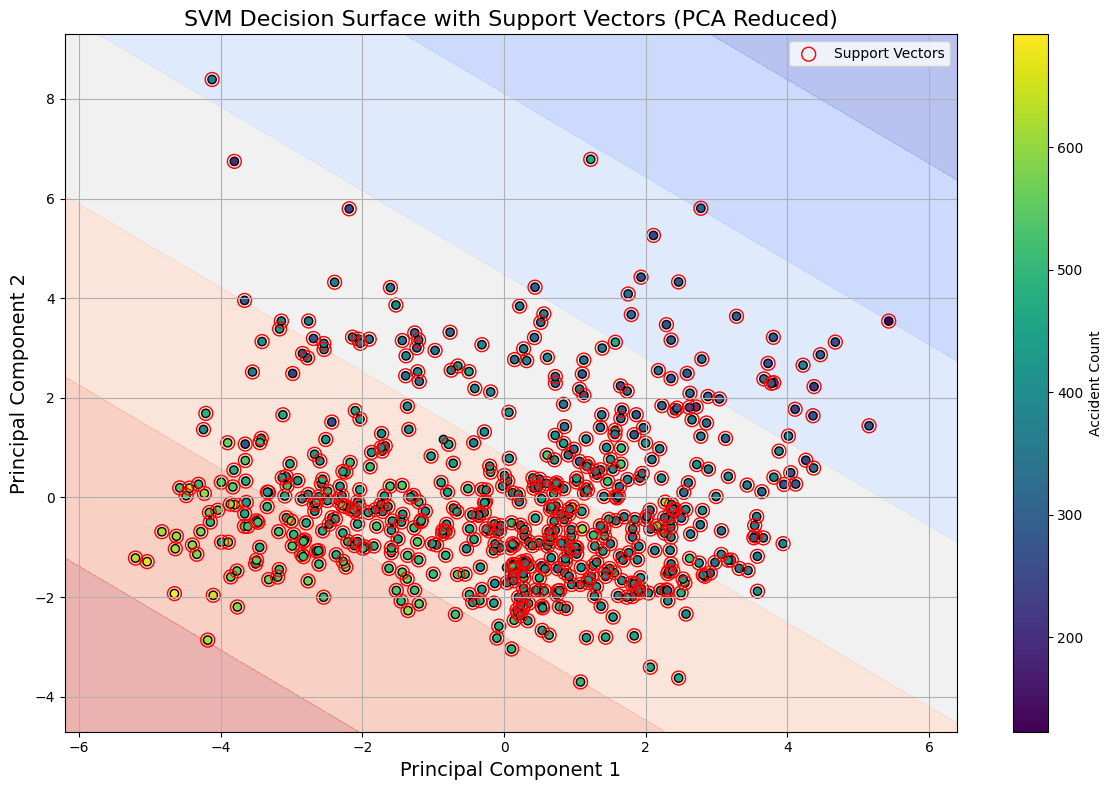

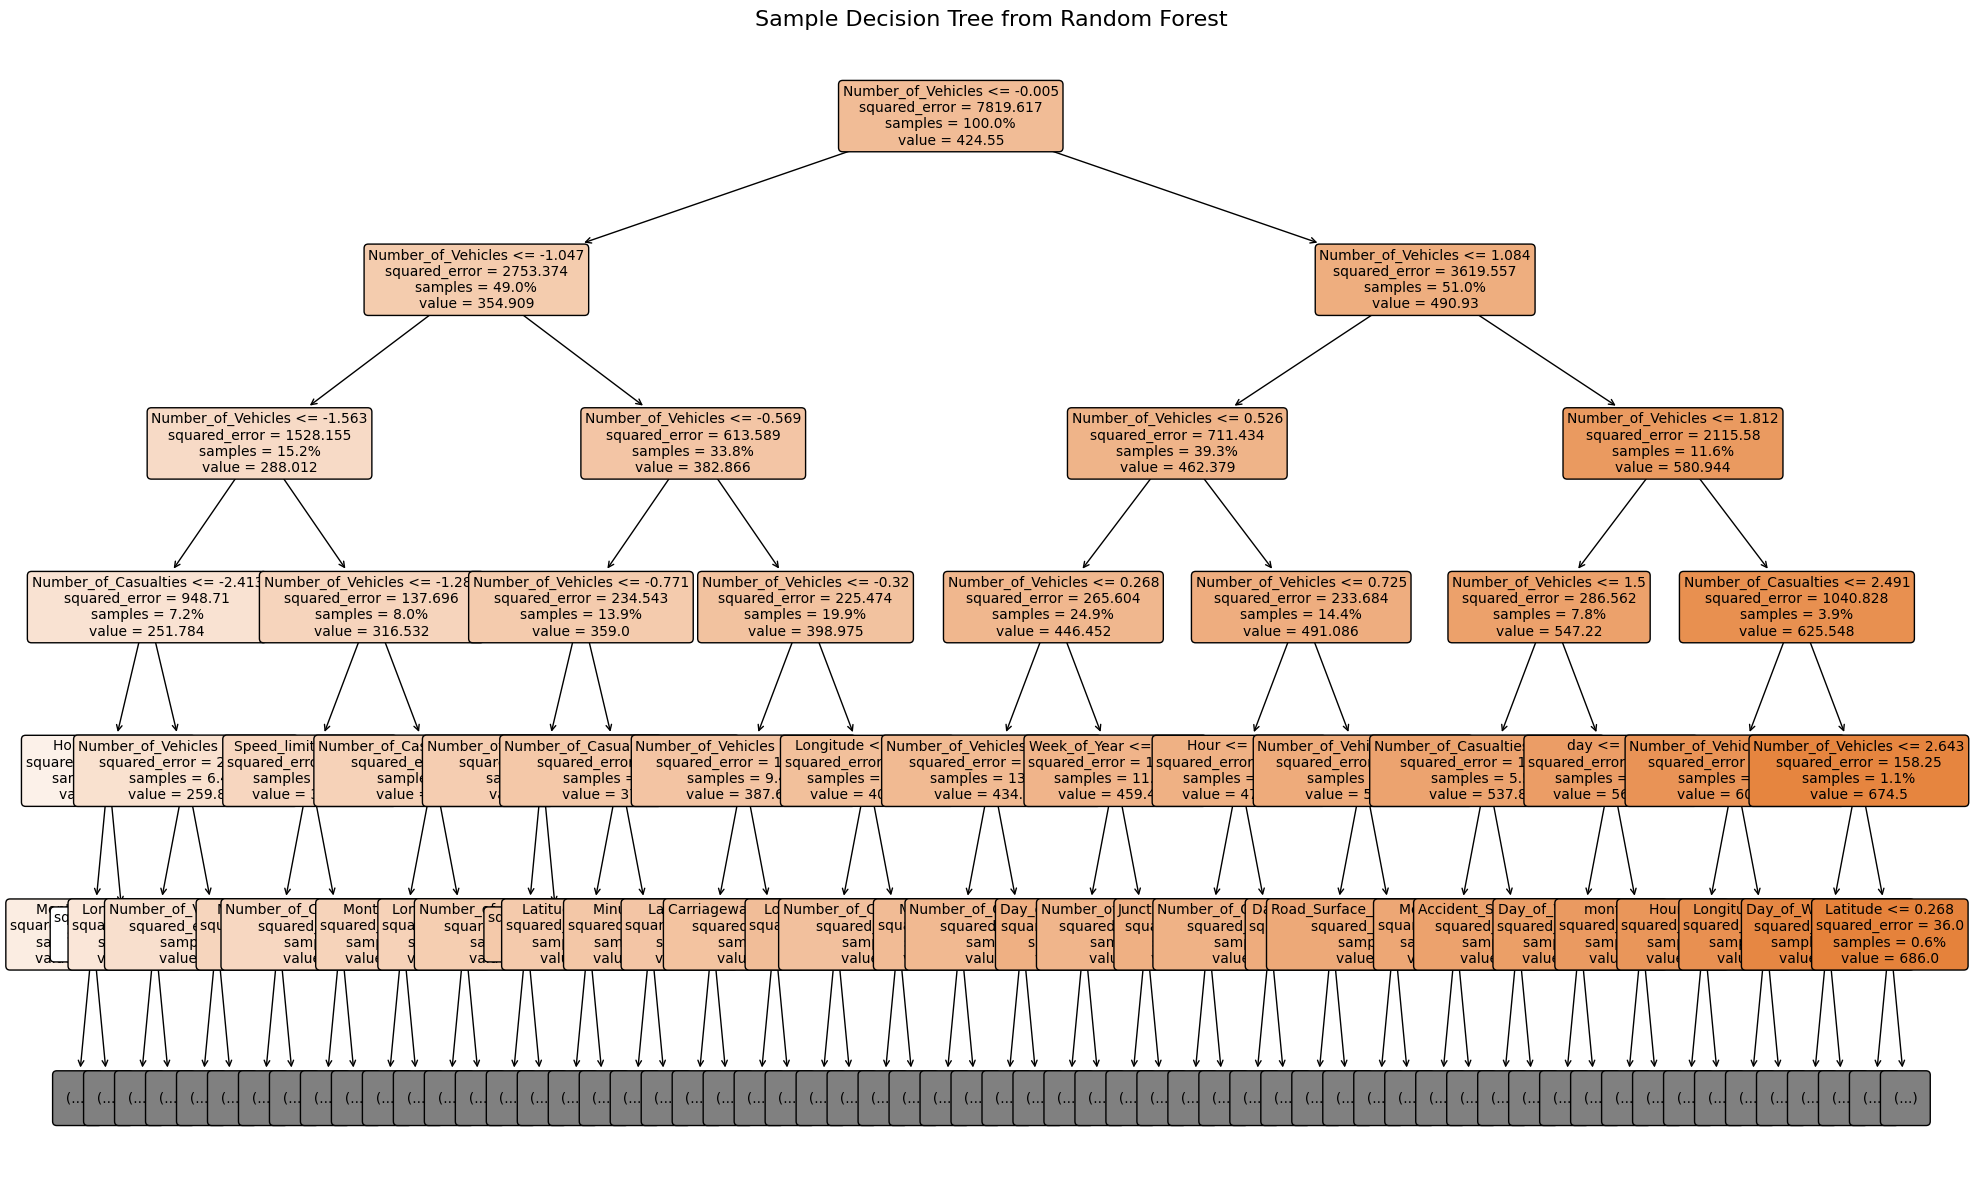

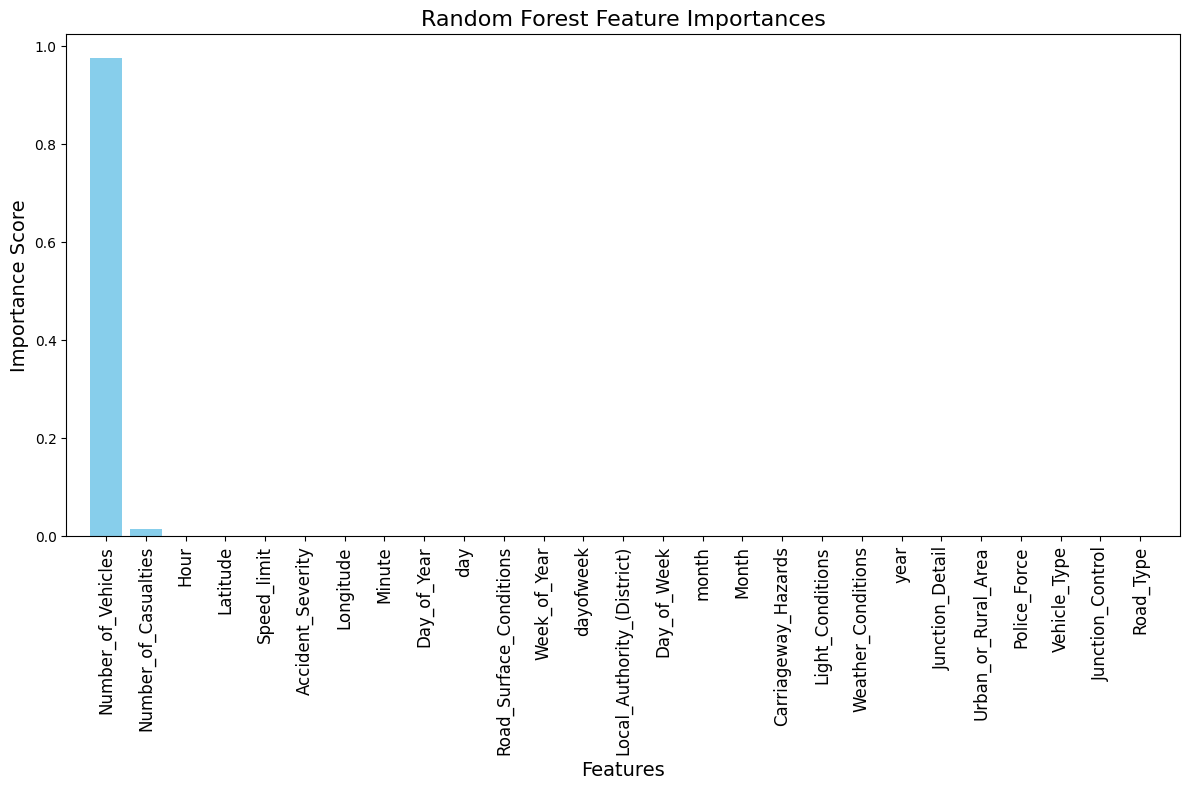

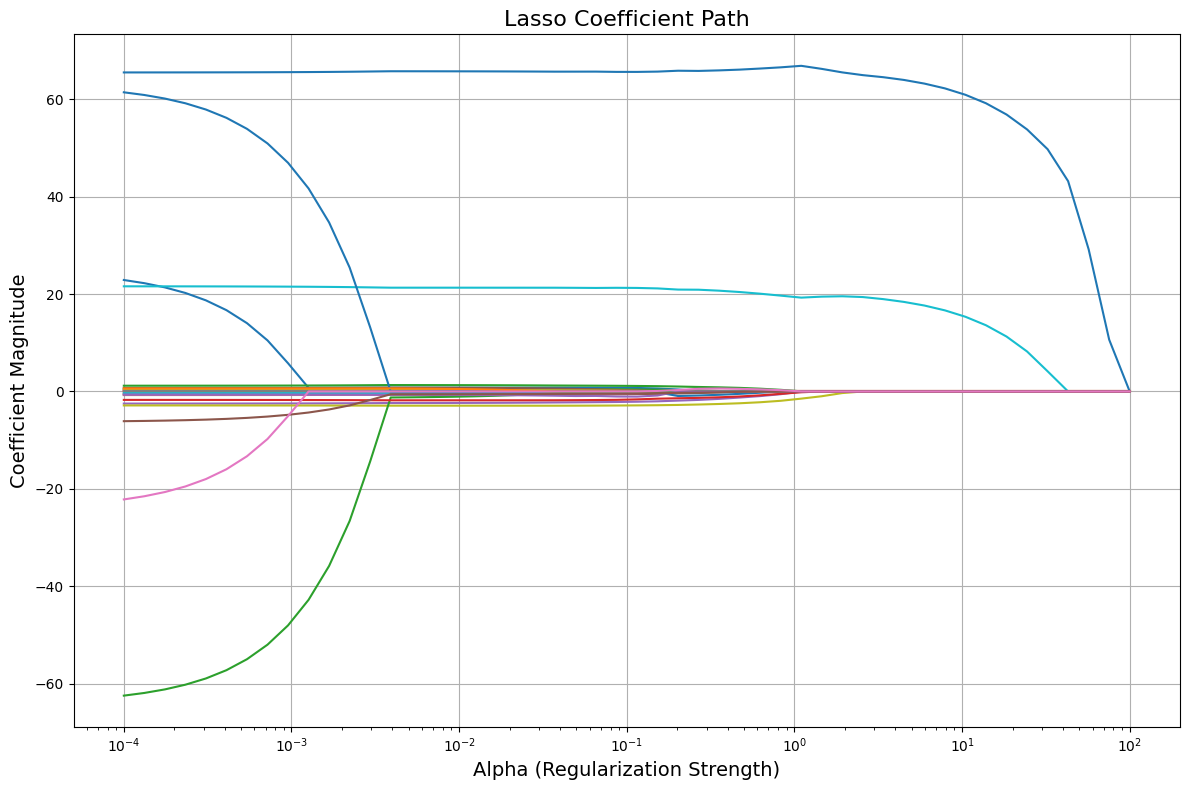

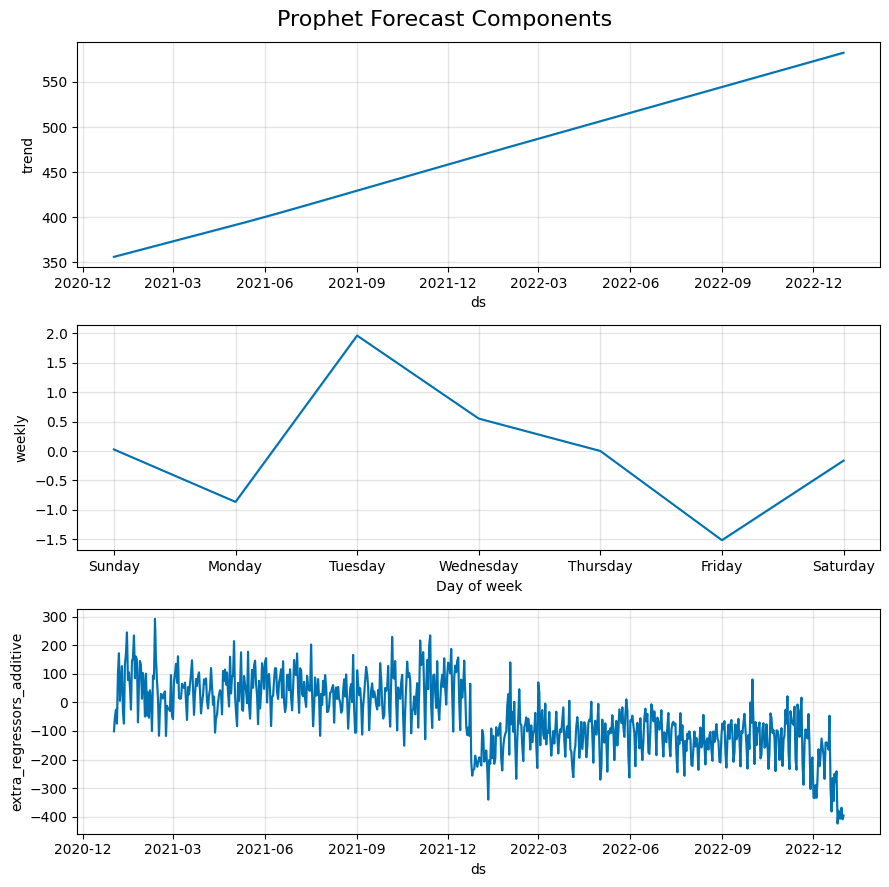

  0%|          | 0/1 [00:00<?, ?it/s]

15:38:38 - cmdstanpy - INFO - Chain [1] start processing
15:38:38 - cmdstanpy - INFO - Chain [1] done processing


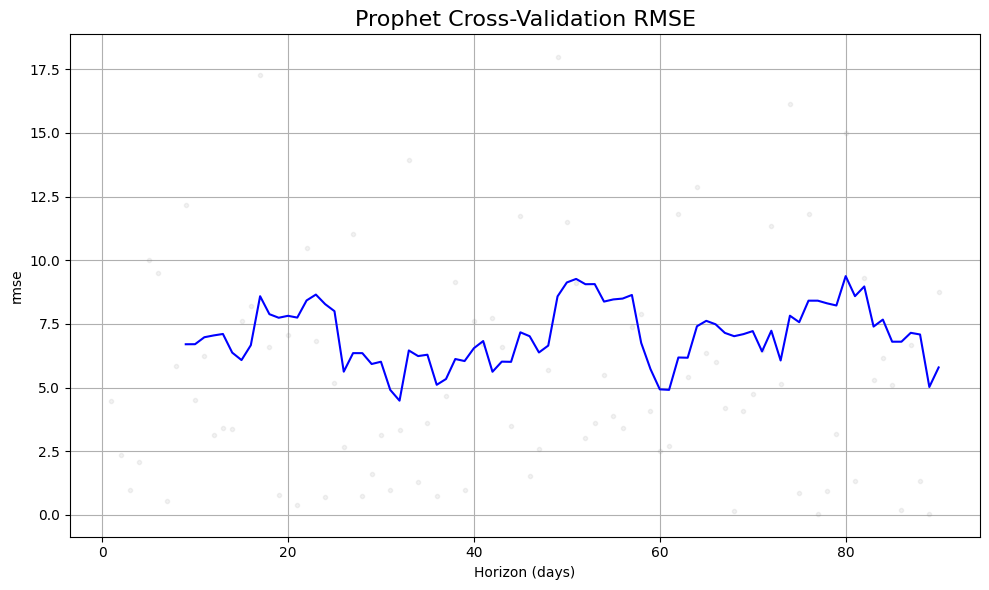

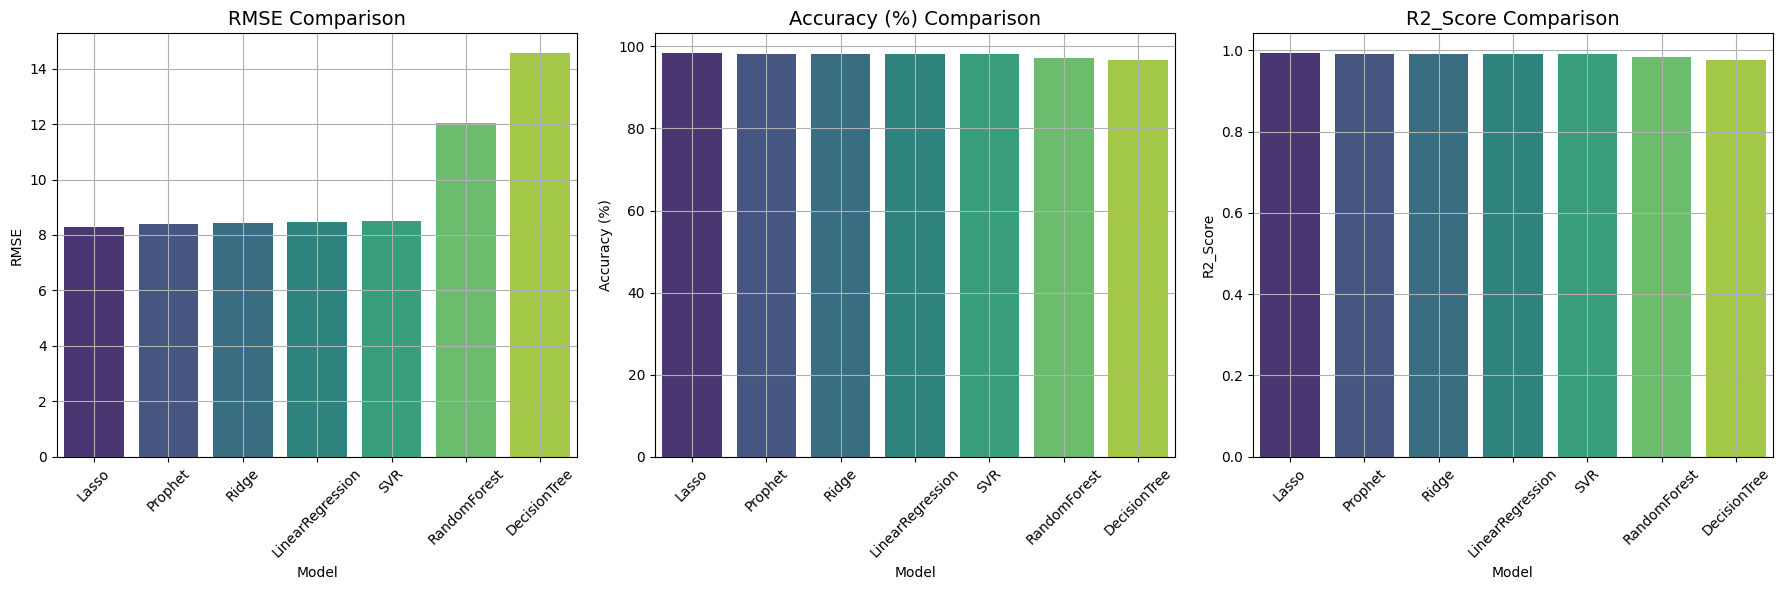

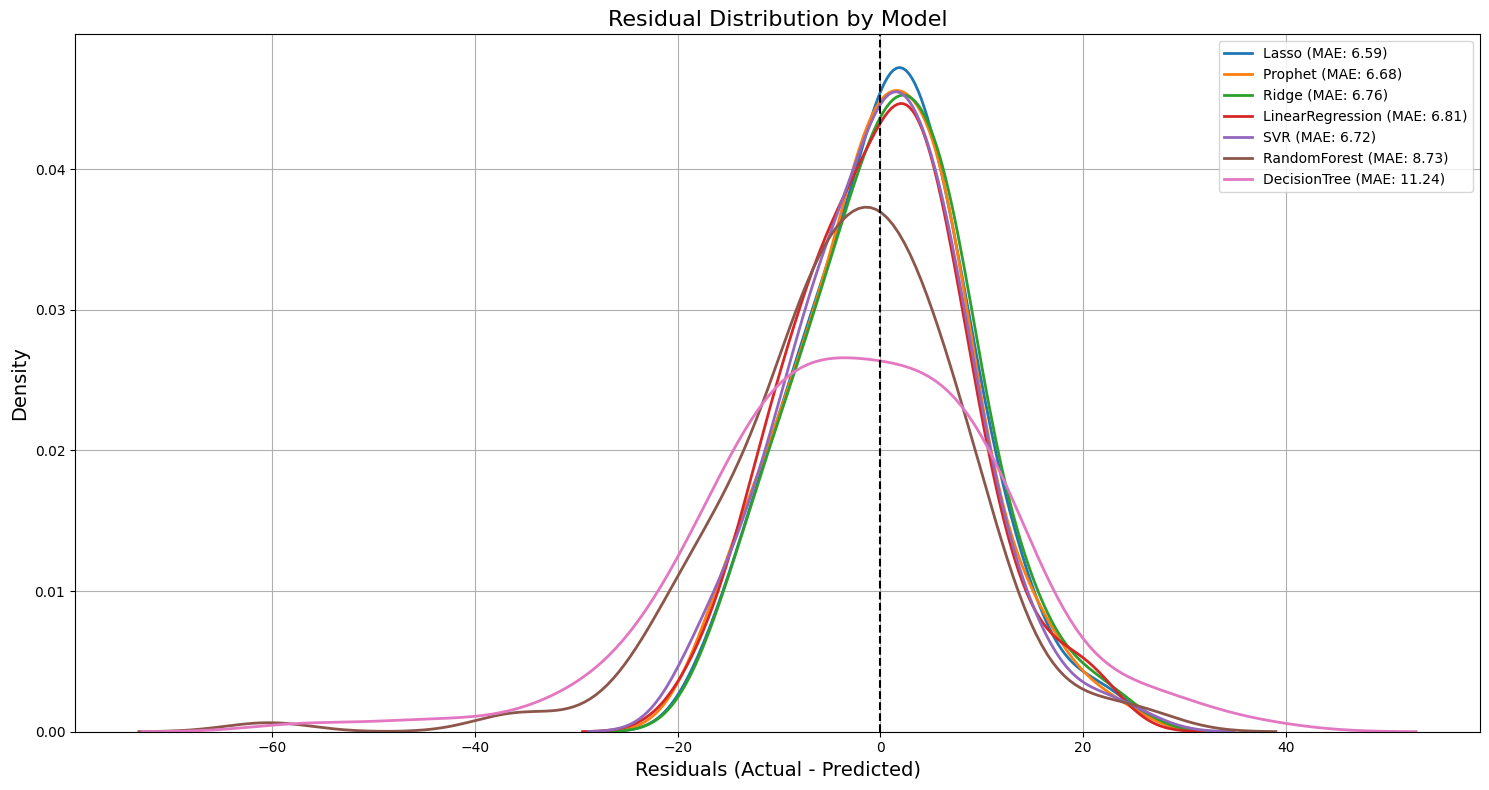

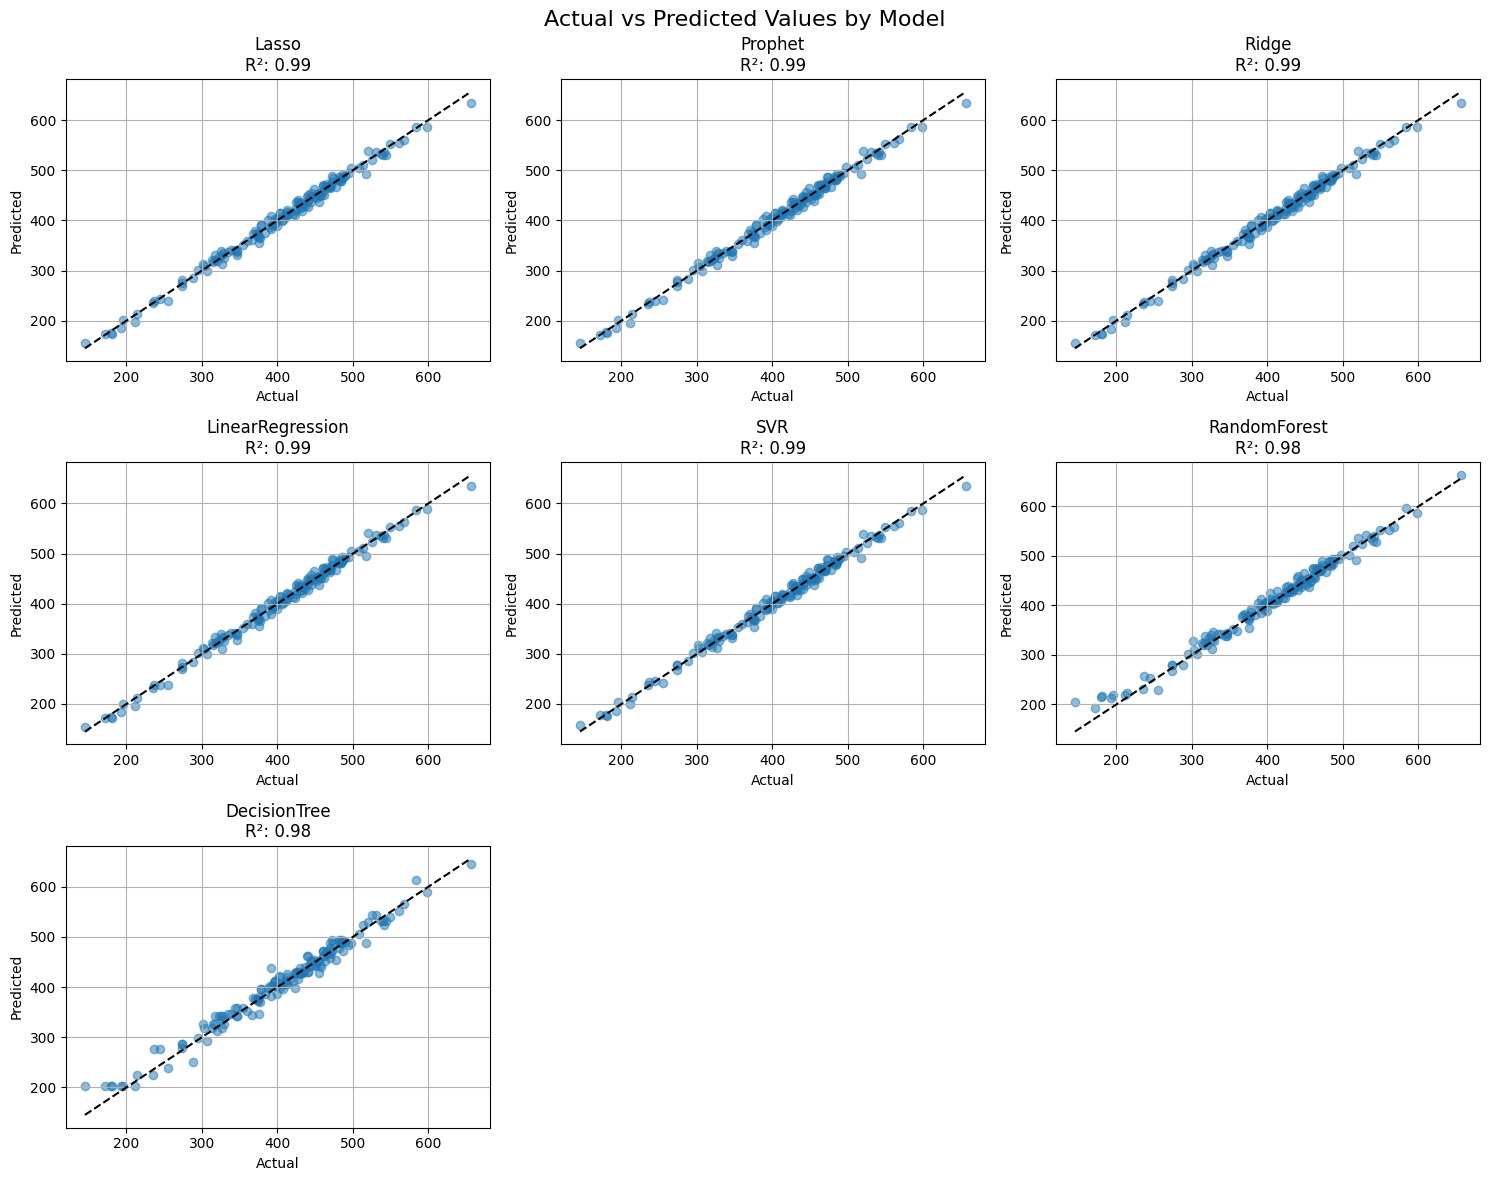


Plotting Actual vs Predicted for each model...

Plotting Test Set Predictions for each model...


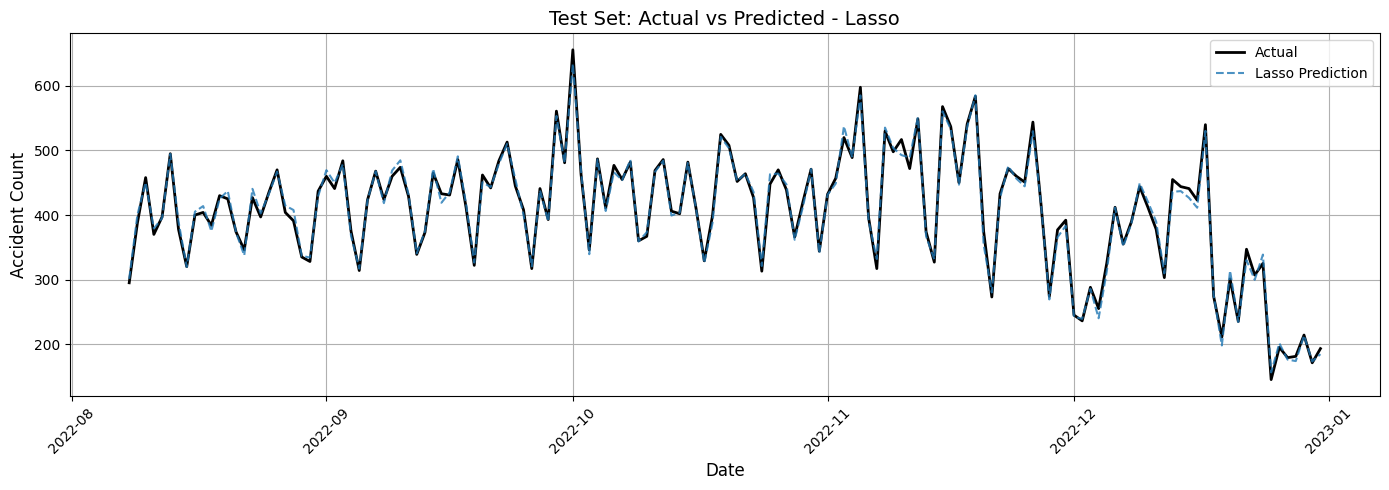

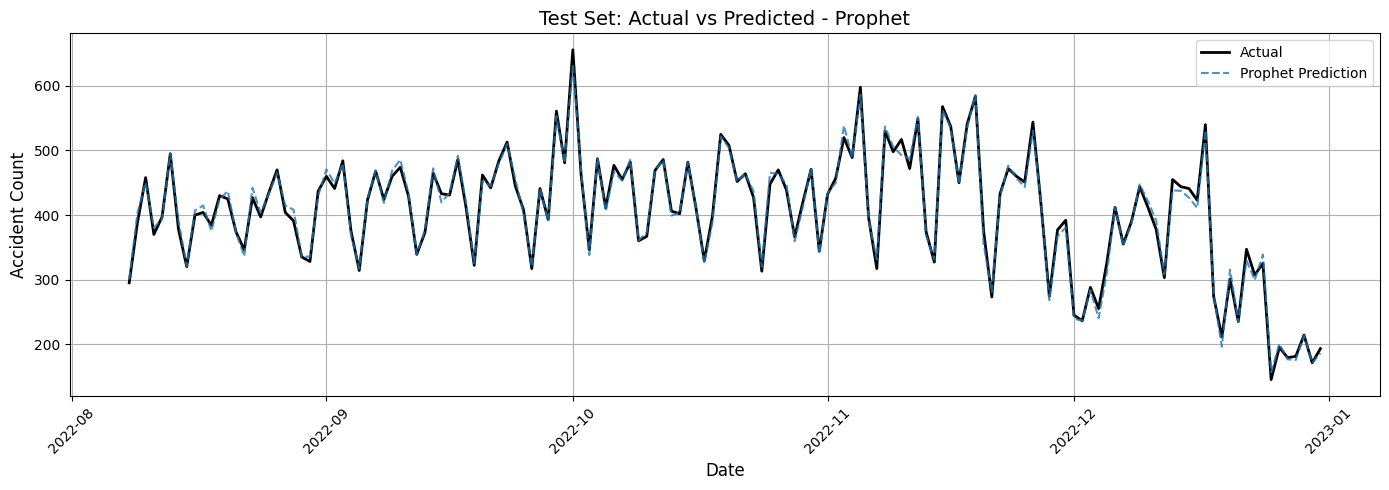

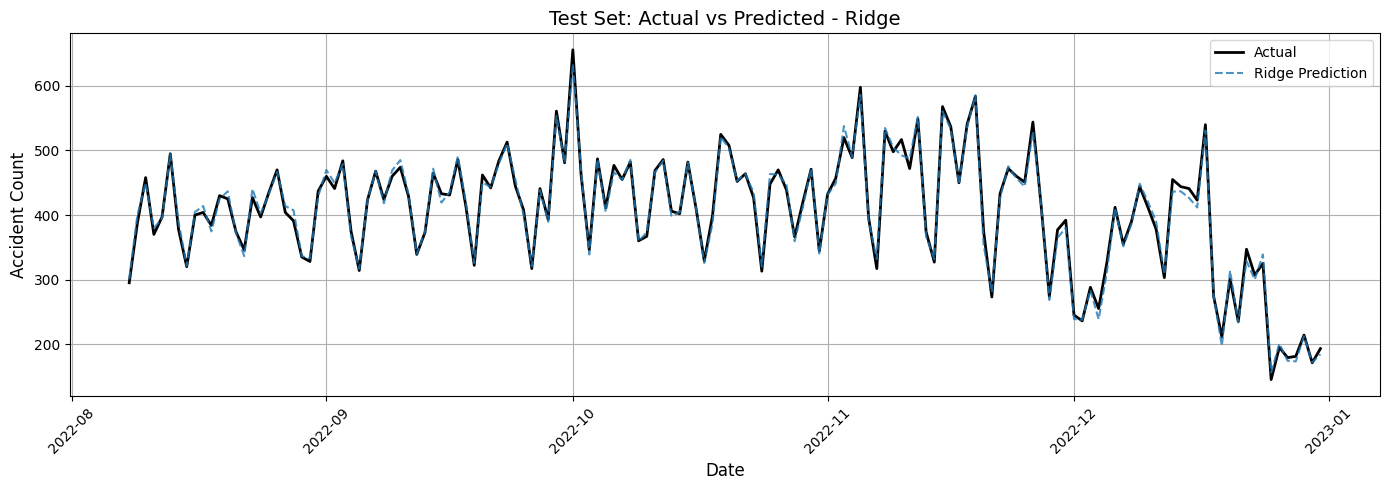

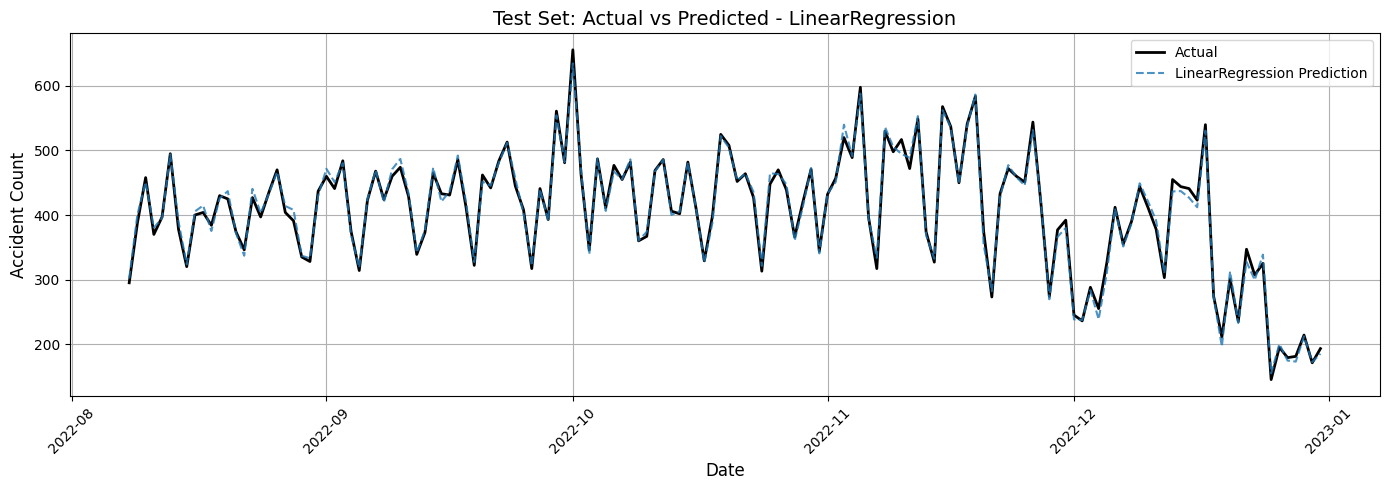

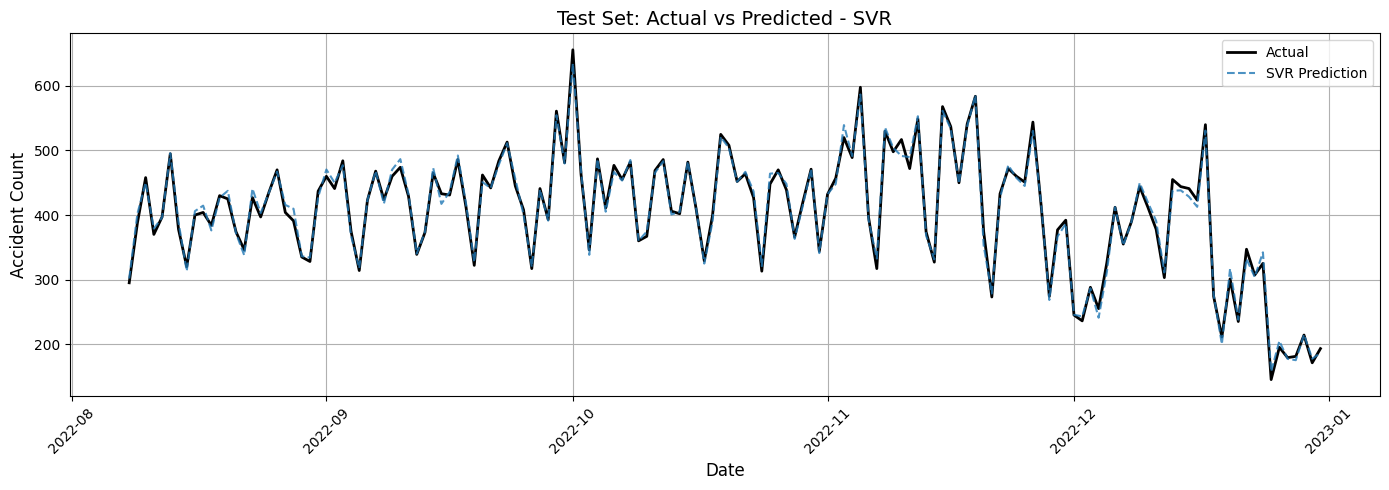

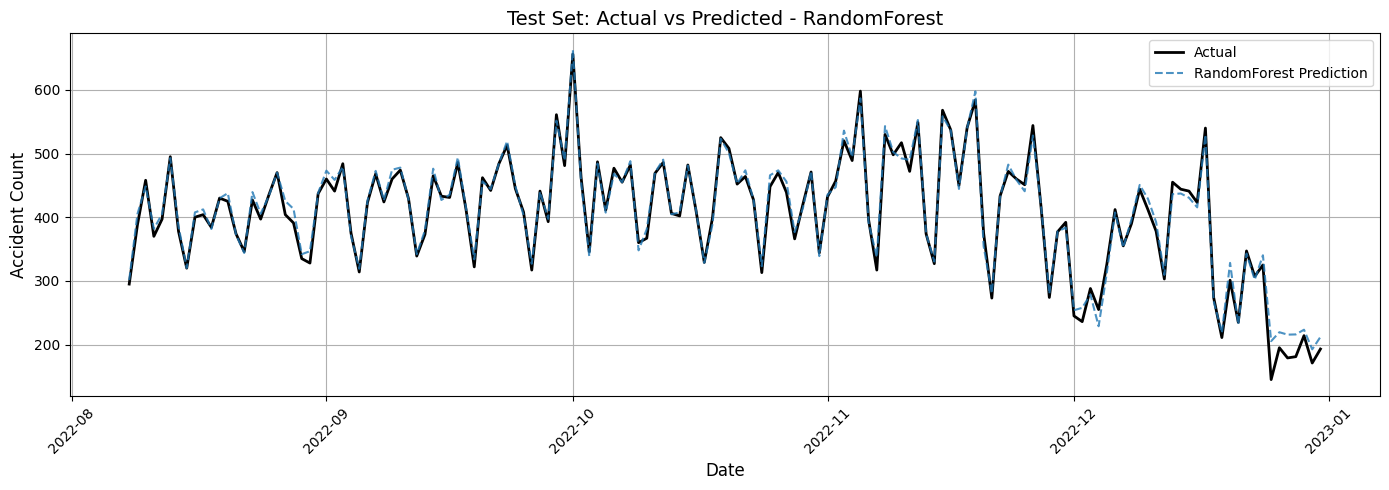

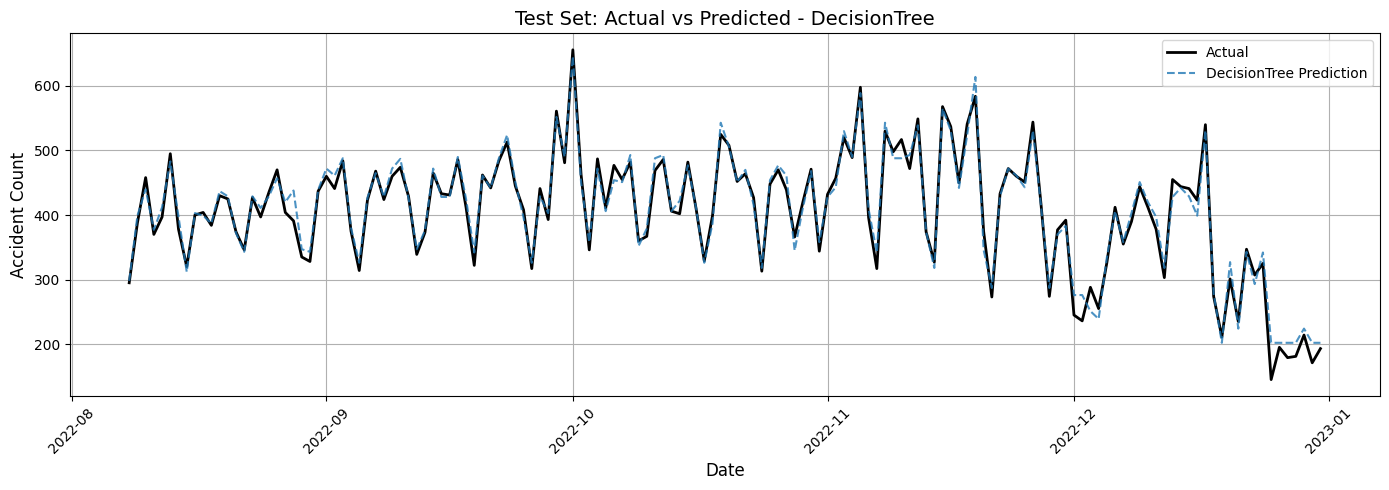

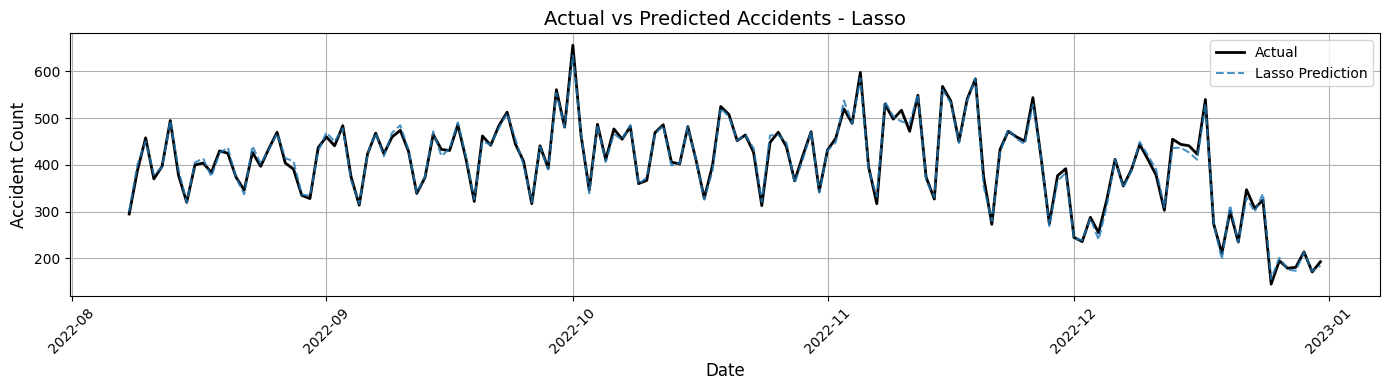

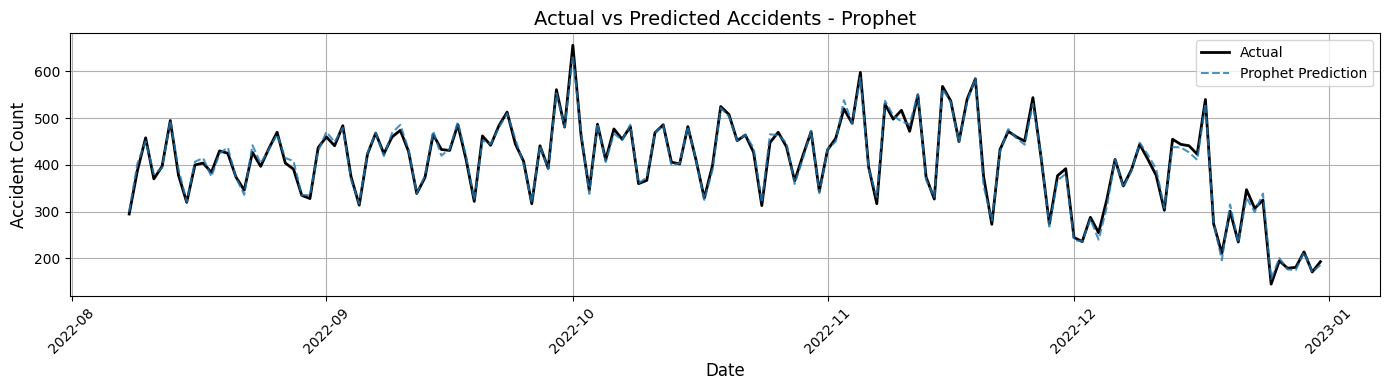

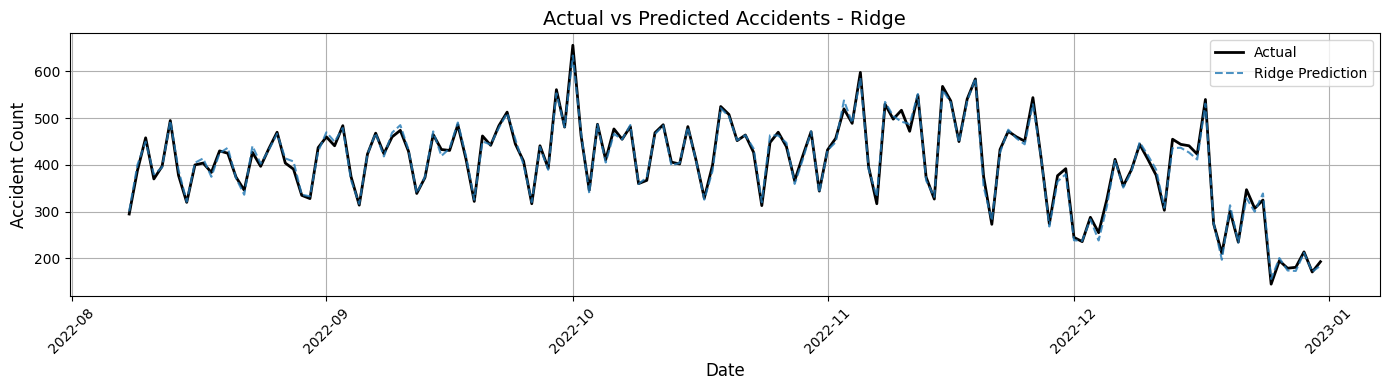

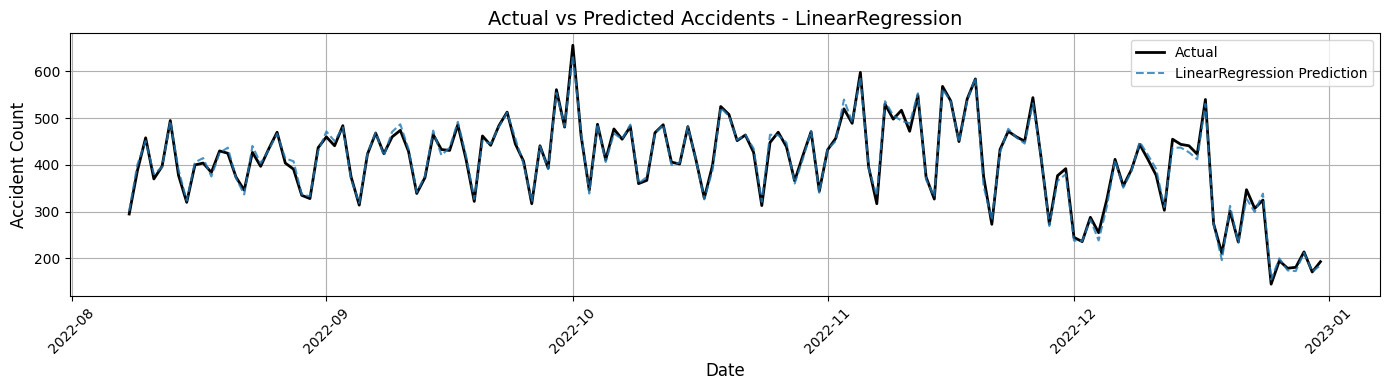

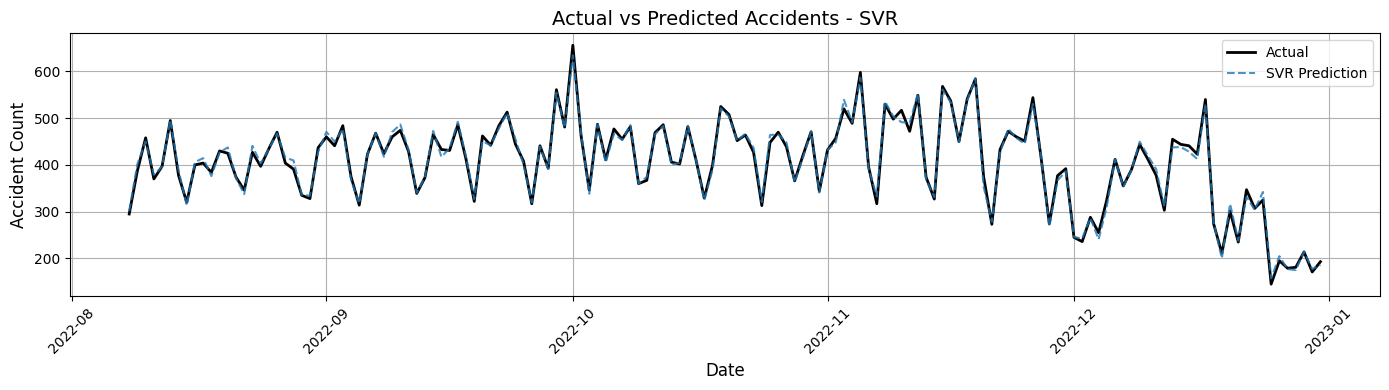

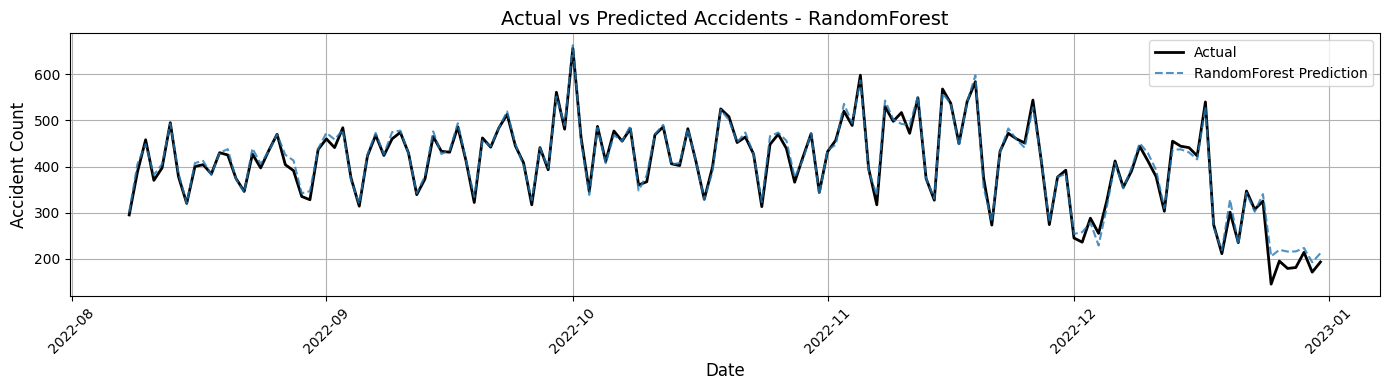

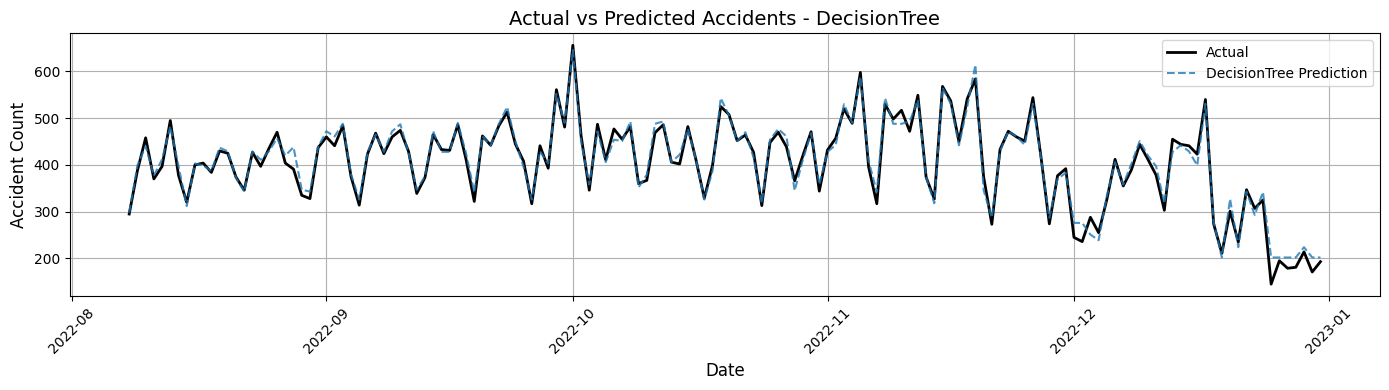

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Assuming df is already loaded
# Data Preparation
df.dropna(subset=['Accident Date'], inplace=True)
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True)

# Feature Engineering
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour.fillna(0)
df['Minute'] = pd.to_datetime(df['Time'], errors='coerce').dt.minute.fillna(0)
df['Date'] = df['Accident Date'].dt.date
df['Day_of_Year'] = df['Accident Date'].dt.dayofyear
df['Week_of_Year'] = df['Accident Date'].dt.isocalendar().week
df['Month'] = df['Accident Date'].dt.month

# Group by date to get accident count per day
target = df.groupby('Date').size().reset_index(name='y')

# Aggregate features per day
agg_features = df.groupby('Date').agg({
    'Day_of_Week': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Junction_Control': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Junction_Detail': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Accident_Severity': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Light_Conditions': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Local_Authority_(District)': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Carriageway_Hazards': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Number_of_Casualties': 'sum',
    'Number_of_Vehicles': 'sum',
    'Police_Force': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Road_Surface_Conditions': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Road_Type': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Speed_limit': 'mean',
    'Urban_or_Rural_Area': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Weather_Conditions': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Vehicle_Type': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Hour': 'mean',
    'Minute': 'mean',
    'Day_of_Year': 'mean',
    'Week_of_Year': 'mean',
    'Month': 'mean'
}).reset_index()

data = pd.merge(target, agg_features, on='Date')

# Encode categorical columns
categorical_cols = [
    'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions',
    'Local_Authority_(District)', 'Carriageway_Hazards', 'Police_Force',
    'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area',
    'Weather_Conditions', 'Vehicle_Type'
]

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Convert Date to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'])
data['ds'] = data['Date']
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['dayofweek'] = data['Date'].dt.dayofweek

# Split data
X = data.drop(columns=['y', 'Date', 'ds'])
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models & Grid
models = [
    {'name': 'LinearRegression', 'model': LinearRegression(), 'params': {}},
    {'name': 'Ridge', 'model': Ridge(), 'params': {'alpha': [0.1, 1, 10]}},
    {'name': 'Lasso', 'model': Lasso(max_iter=10000), 'params': {'alpha': [0.1, 1, 10]}},
    {'name': 'DecisionTree', 'model': DecisionTreeRegressor(), 'params': {'max_depth': [5, 10, 20]}},
    {'name': 'RandomForest', 'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100], 'max_depth': [5, 10]}},
    {'name': 'SVR', 'model': SVR(), 'params': {'kernel': ['linear', 'rbf'], 'C': [1, 10], 'gamma': ['scale', 'auto']}},
]

results = []

for item in models:
    print(f"Training {item['name']}...")
    grid = GridSearchCV(item['model'], item['params'], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 100 - (mape * 100)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': item['name'],
        'Best Params': grid.best_params_,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE (%)': round(mape * 100, 2),
        'Accuracy (%)': round(accuracy, 2),
        'R2_Score': round(r2, 4),
        'y_pred': y_pred,
        'model_obj': best_model
    })
# Prophet Model
print("Training Prophet...")
prophet_data = data[['ds', 'y']].copy()

# Add additional regressors from X and cast to float
for col in X.columns:
    prophet_data[col] = data[col].astype(float)

# Split into train/test (preserving time order)
train_size = int(len(prophet_data) * 0.8)
prophet_train = prophet_data.iloc[:train_size].copy()
prophet_test = prophet_data.iloc[train_size:].copy()

# Prophet hyperparameter grid
from itertools import product
prophet_params = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}
param_combinations = [dict(zip(prophet_params.keys(), v)) for v in product(*prophet_params.values())]

prophet_results = []
best_prophet = None
best_prophet_rmse = float('inf')

for params in param_combinations[:5]:  # Try only first 5 combinations
    try:
        model = Prophet(**params)

        # Add all regressors
        for col in X.columns:
            model.add_regressor(col)

        model.fit(prophet_train)

        # Create future dataframe and add regressors
        future = model.make_future_dataframe(periods=len(prophet_test), freq='D')

        for col in X.columns:
            future[col] = np.concatenate([
                prophet_train[col].astype(float).values,
                prophet_test[col].astype(float).values
            ])

        forecast = model.predict(future)

        # Evaluate on test set
        test_forecast = forecast.iloc[-len(prophet_test):]
        y_true = prophet_test['y'].values
        y_pred = test_forecast['yhat'].values

        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        prophet_results.append({
            'params': params,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        })

        if rmse < best_prophet_rmse:
            best_prophet_rmse = rmse
            best_prophet = model

    except Exception as e:
        print(f"Error with params {params}: {str(e)}")
        continue

# Add best Prophet results
if best_prophet:
    future = best_prophet.make_future_dataframe(periods=len(prophet_test), freq='D')
    for col in X.columns:
        future[col] = np.concatenate([
            prophet_train[col].astype(float).values,
            prophet_test[col].astype(float).values
        ])

    forecast = best_prophet.predict(future)
    test_forecast = forecast.iloc[-len(prophet_test):]
    y_pred_prophet = test_forecast['yhat'].values

    results.append({
        'Model': 'Prophet',
        'Best Params': prophet_results[np.argmin([x['RMSE'] for x in prophet_results])]['params'],
        'MAE': round(mean_absolute_error(prophet_test['y'], y_pred_prophet), 2),
        'RMSE': round(np.sqrt(mean_squared_error(prophet_test['y'], y_pred_prophet)), 2),
        'MAPE (%)': round(mean_absolute_percentage_error(prophet_test['y'], y_pred_prophet) * 100, 2),
        'Accuracy (%)': round(100 - (mean_absolute_percentage_error(prophet_test['y'], y_pred_prophet) * 100), 2),
        'R2_Score': round(r2_score(prophet_test['y'], y_pred_prophet), 4),
        'y_pred': y_pred_prophet,
        'model_obj': best_prophet
    })


results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("Model Comparison:")
print(results_df[['Model', 'Best Params', 'RMSE', 'Accuracy (%)', 'R2_Score']])


# ======================
#  Visualizations
# ======================

# 1. Time Series of Actual vs Predicted with Dates
plt.figure(figsize=(18, 8))
dates = data['Date'].iloc[-len(y_test):].values

plt.plot(dates, y_test.values, label='Actual', color='black', linewidth=2)

for i, row in enumerate(results_df.itertuples()):
    plt.plot(dates, row.y_pred, label=f"{row.Model} (RMSE: {row.RMSE:.2f})", 
             linestyle='--', alpha=0.8)

plt.title("Time Series of Actual vs Predicted Values", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Accident Count", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. SVM Support Vectors Visualization (using PCA for dimensionality reduction)
svm_row = results_df[results_df['Model'] == 'SVR']
if not svm_row.empty:
    svm_model = svm_row.iloc[0]['model_obj']
    
    # Reduce to 2D using PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    
    # Retrain SVM on PCA components (for visualization only)
    svm_pca = SVR(**svm_row.iloc[0]['Best Params'])
    svm_pca.fit(X_train_pca, y_train)
    
    # Create grid for decision boundary
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
    
    # Highlight support vectors
    sv_indices = svm_pca.support_
    plt.scatter(X_train_pca[sv_indices, 0], X_train_pca[sv_indices, 1], 
                facecolors='none', edgecolors='red', s=100, 
                label='Support Vectors')
    
    plt.colorbar(scatter, label='Accident Count')
    plt.title("SVM Decision Surface with Support Vectors (PCA Reduced)", fontsize=16)
    plt.xlabel("Principal Component 1", fontsize=14)
    plt.ylabel("Principal Component 2", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Random Forest Tree Visualization 
rf_row = results_df[results_df['Model'] == 'RandomForest']
if not rf_row.empty:
    rf_model = rf_row.iloc[0]['model_obj']
    
    # Plot one of the trees in the forest
    plt.figure(figsize=(20, 12))
    plot_tree(rf_model.estimators_[0], 
              feature_names=X.columns, 
              filled=True, 
              rounded=True, 
              max_depth=5,  
              proportion=True,
              fontsize=10)
    plt.title("Sample Decision Tree from Random Forest", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Feature Importance
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title("Random Forest Feature Importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices], color='skyblue', align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90, fontsize=12)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Importance Score", fontsize=14)
    plt.tight_layout()
    plt.show()

# 4. Lasso Coefficient Path
lasso_row = results_df[results_df['Model'] == 'Lasso']
if not lasso_row.empty:
    alphas = np.logspace(-4, 2, 50)
    coefs = []
    
    for a in alphas:
        lasso = Lasso(alpha=a, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        coefs.append(lasso.coef_)
    
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.title("Lasso Coefficient Path", fontsize=16)
    plt.xlabel("Alpha (Regularization Strength)", fontsize=14)
    plt.ylabel("Coefficient Magnitude", fontsize=14)
    plt.axis('tight')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Prophet Components Plot
if best_prophet:
    fig = best_prophet.plot_components(forecast)
    plt.suptitle("Prophet Forecast Components", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Cross-validation
    df_cv = cross_validation(best_prophet, initial='365 days', period='180 days', horizon='90 days')
    df_p = performance_metrics(df_cv)
    
    # Plot cross-validation metrics
    fig = plot_cross_validation_metric(df_cv, metric='rmse')
    plt.title("Prophet Cross-Validation RMSE", fontsize=16)
    plt.tight_layout()
    plt.show()

# 6. Model Performance Comparison
metrics = ['RMSE', 'Accuracy (%)', 'R2_Score']

plt.figure(figsize=(18, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'{metric} Comparison', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Residual Analysis by Model
plt.figure(figsize=(15, 8))
for i, row in enumerate(results_df.itertuples()):
    residuals = y_test - row.y_pred
    sns.kdeplot(residuals, label=f"{row.Model} (MAE: {row.MAE:.2f})", linewidth=2)
    
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Residual Distribution by Model", fontsize=16)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 8. Actual vs Predicted Scatter Plots
import math

num_models = len(results_df)
cols = 3
rows = math.ceil(num_models / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
results_df.rename(columns={'R² Score': 'R2_Score'}, inplace=True)

for i, row in enumerate(results_df.itertuples()):
    plt.subplot(rows, cols, i+1)
    plt.scatter(y_test, row.y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.title(f"{row.Model}\nR²: {row.R2_Score:.2f}", fontsize=12)
    plt.xlabel("Actual", fontsize=10)
    plt.ylabel("Predicted", fontsize=10)
    plt.grid(True)

plt.suptitle("Actual vs Predicted Values by Model", fontsize=16)
plt.tight_layout()
plt.show()


print("\nPlotting Actual vs Predicted for each model...")

dates = data['Date'].iloc[-len(y_test):].values  
# ======================
# Testing Set Predictions (Line Plot per Model)
# ======================
print("\nPlotting Test Set Predictions for each model...")

dates = data['Date'].iloc[-len(y_test):].values

for i, row in enumerate(results_df.itertuples()):
    plt.figure(figsize=(14, 5))
    plt.plot(dates, y_test.values, label='Actual', color='black', linewidth=2)
    plt.plot(dates, row.y_pred, label=f'{row.Model} Prediction', linestyle='--', alpha=0.8)
    plt.title(f"Test Set: Actual vs Predicted - {row.Model}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Accident Count", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for i, row in enumerate(results_df.itertuples()):
    plt.figure(figsize=(14, 4))
    plt.plot(dates, y_test.values, label='Actual', color='black', linewidth=2)
    plt.plot(dates, row.y_pred, label=f'{row.Model} Prediction', linestyle='--', alpha=0.8)
    
    plt.title(f"Actual vs Predicted Accidents - {row.Model}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Accident Count", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
